In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import json
from data_analysis import DataOrganize
from portfolio_manager import PortfolioManager
from coins import get_top_coins

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
f = open('./Telegram_Data/result.json', encoding='utf8')
data = json.load(f)
for key in data.keys():
    print(key)

name
type
id
messages


In [3]:
df = pd.DataFrame(data['messages'])
df = df.iloc[0:1000]
data_organize = DataOrganize(df)
data_organize.clean_data()
top_coins_number = 10

100%|██████████| 732/732 [00:00<00:00, 26352.78it/s]


In [4]:
coins_list = get_top_coins(top_coins_number)

In [5]:

coins_name = [coin['name'] for coin in coins_list]
coins_symbol = [coin['symbol'] for coin in coins_list]
data_organize.filter_by_coin(coins_name,coins_symbol)
data_organize.analyze_sentiment()

100%|██████████| 58/58 [00:00<00:00, 4132.18it/s]


In [6]:
from datetime import datetime
from importlib import reload
import portfolio_manager
reload(portfolio_manager)
portfolio = portfolio_manager.PortfolioManager(coins_list,data_organize.data)
# Input string
date_string = "2 May 2021"

# Convert string to date
current_date = pd.to_datetime(date_string, format="%d %B %Y")
weights = portfolio.getWeights(current_date)

d:\University\researches\fazli\code\crypto_sentiment\portfolio_manager.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data['date'] = pd.to_datetime(coin_data['date'])


In [7]:

weights = {key + '-USD': value*100 for key, value in weights.items()}
average_index = {}
top_coins = get_top_coins(top_coins_number)
for coin in top_coins:
  coin_symbol = coin['symbol']
  average_index[coin_symbol] = 1/top_coins_number

average_index = {key + '-USD': value*100 for key, value in average_index.items()}

members = []
members+=average_index.keys()


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata["Date"] = basedata["Date"].dt.date
basedata = basedata.rename(columns = {"Open":members[0]})
if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata["Date"] = newdata["Date"].dt.date
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")

basedata = basedata[  basedata["Date"] > pd.to_datetime("2021-05-01")]
print(basedata)

            Date       BTC-USD      ETH-USD  USDT-USD   XRP-USD     BNB-USD  \
224   2021-05-02  57825.863281  2945.560059  0.999912  1.651960  619.972107   
225   2021-05-03  56620.273438  2951.175781  0.999959  1.562493  621.902710   
226   2021-05-04  57214.179688  3431.131592  0.999931  1.555954  676.315918   
227   2021-05-05  53252.164062  3240.554688  0.999983  1.388070  609.331055   
228   2021-05-06  57441.308594  3524.930908  1.000069  1.615507  651.049500   
...          ...           ...          ...       ...       ...         ...   
1170  2023-12-04  39978.628906  2193.663330  1.000307  0.623676  228.075470   
1171  2023-12-05  41986.265625  2243.092529  0.999974  0.624396  233.308655   
1172  2023-12-06  44080.023438  2293.628174  1.000220  0.621962  231.263443   
1173  2023-12-07  43769.132812  2233.217773  1.000011  0.640487  229.532211   
1174  2023-12-08  43293.136719  2357.169189  1.000372  0.643668  232.960495   

        SOL-USD  USDC-USD   ADA-USD  DOGE-USD   AVA

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [8]:
for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])

basedata = PortfolioCalc(weights, basedata, "crypto1")
basedata = PortfolioCalc(average_index, basedata, "crypto2")

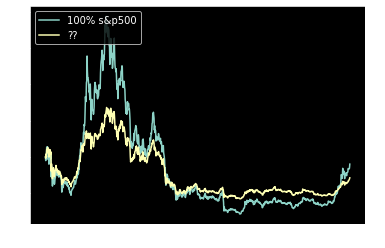

In [9]:
plt.style.use("dark_background")

plt.plot(basedata["Date"], basedata["crypto1"], label = "100% s&p500")
plt.plot(basedata["Date"], basedata["crypto2"], label = "??")

plt.legend(loc="upper left")
plt.show()